<a href="https://colab.research.google.com/github/majorjeon/Kuis_PCD_2206123/blob/main/4_Pendeteksi_tepi_pada_citra_Noisy.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


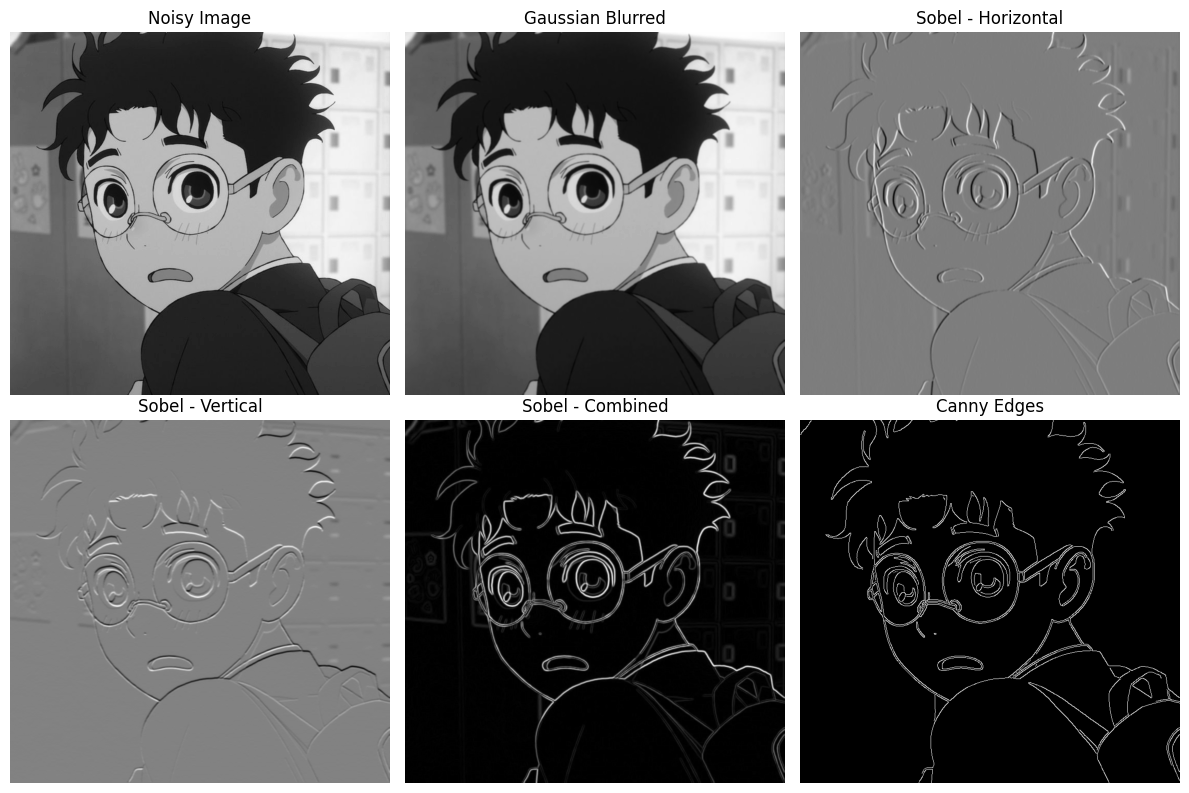

In [2]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# 1. Memuat citra dengan derau salt-and-pepper
# Gantilah 'noisy_image.jpg' dengan path citra Anda
image = cv2.imread('/content/drive/MyDrive/PCD/okarunn.jpg', cv2.IMREAD_GRAYSCALE)

# 2. Melakukan smoothing menggunakan Gaussian filter
gaussian_blurred = cv2.GaussianBlur(image, (5, 5), 1.0)

# 3. Deteksi tepi menggunakan metode Sobel
sobel_x = cv2.Sobel(gaussian_blurred, cv2.CV_64F, 1, 0, ksize=3)  # Gradien horizontal
sobel_y = cv2.Sobel(gaussian_blurred, cv2.CV_64F, 0, 1, ksize=3)  # Gradien vertikal
sobel_combined = cv2.magnitude(sobel_x, sobel_y)  # Kombinasi magnitudo gradien

# 4. Deteksi tepi menggunakan metode Canny
canny_edges = cv2.Canny(gaussian_blurred, 50, 150)  # Threshold rendah dan tinggi

# 5. Menampilkan hasil
plt.figure(figsize=(12, 8))

# Citra asli dengan derau
plt.subplot(2, 3, 1)
plt.title("Noisy Image")
plt.imshow(image, cmap='gray')
plt.axis('off')

# Citra setelah smoothing
plt.subplot(2, 3, 2)
plt.title("Gaussian Blurred")
plt.imshow(gaussian_blurred, cmap='gray')
plt.axis('off')

# Hasil Sobel X
plt.subplot(2, 3, 3)
plt.title("Sobel - Horizontal")
plt.imshow(sobel_x, cmap='gray')
plt.axis('off')

# Hasil Sobel Y
plt.subplot(2, 3, 4)
plt.title("Sobel - Vertical")
plt.imshow(sobel_y, cmap='gray')
plt.axis('off')

# Hasil Sobel Combined
plt.subplot(2, 3, 5)
plt.title("Sobel - Combined")
plt.imshow(sobel_combined, cmap='gray')
plt.axis('off')

# Hasil Canny
plt.subplot(2, 3, 6)
plt.title("Canny Edges")
plt.imshow(canny_edges, cmap='gray')
plt.axis('off')

plt.tight_layout()
plt.show()


# penjelsan kode

1. Input Citra:
Citra dengan derau salt-and-pepper dimuat dalam mode grayscale untuk analisis intensitas.

2. Smoothing dengan Gaussian Filter:
Gaussian filter mengurangi derau dengan melakukan konvolusi menggunakan kernel Gaussian. Ini sangat efektif untuk menghaluskan derau "salt-and-pepper."

3. Deteksi Tepi dengan Sobel:

* Gradien horizontal dan vertikal dihitung menggunakan fungsi cv2.Sobel.
* Magnitudo gradien digabung untuk mendapatkan peta tepi gabungan.
4. Deteksi Tepi dengan Canny:

* Tepi yang paling signifikan dideteksi dengan mempertimbangkan gradien dan thresholding.
5. Visualisasi:
Hasil deteksi tepi ditampilkan berdampingan dengan citra asli dan citra yang telah dihaluskan.

# analisis dan perbandingan

1. Sobel:

* Cocok untuk mendeteksi tepi utama (gradien intensitas besar).
* Kurang efektif untuk mendeteksi tepi halus, terutama setelah derau tinggi.
2. Canny:

* Memberikan hasil deteksi tepi yang lebih tajam dan presisi.
* Lebih efektif untuk citra yang telah dihaluskan karena melibatkan penyaringan derau secara internal dan thresholding.
3. Citra Asli vs. Tepi Deteksi:

* Pada citra asli, derau "salt-and-pepper" dapat mengganggu deteksi tepi.
* Setelah smoothing dengan Gaussian, metode Sobel dan Canny memberikan peta tepi yang lebih bersih dan konsisten.
Hasil ini menunjukkan bahwa smoothing menggunakan Gaussian filter sangat membantu dalam meningkatkan kualitas deteksi tepi, terutama untuk citra dengan derau tinggi.